In [3]:
# system
import os

# scipy
import numpy as np

# matplotlib
import matplotlib.pyplot as plt

# nutrig
import database.tools as tools

#plt.style.use('seaborn-v0_8-colorblind')
plt.style.use('tableau-colorblind10')
plt.style.use('/pbs/home/p/pcorrea/tools/matplotlib_style_sans-serif.txt')

%matplotlib inline

Welcome to JupyROOT 6.26/10


Load in results of template FLT for testING datasets

In [20]:
n_templates = 96
corr_window = [-15,15]
fit_window  = [-10,30]

param_str = f'templates_{n_templates}_cw_{corr_window[0]}_{corr_window[1]}_fw_{fit_window[0]}_{fit_window[1]}'
title_str = f'{n_templates} templates, CW = [{corr_window[0]},{corr_window[1]}], FW = [{fit_window[0]},{fit_window[1]}]'

plot_dir = '/pbs/home/p/pcorrea/grand/nutrig/plots'
savefig  = True

In [14]:
bkg_test_res_file = f'/sps/grand/pcorrea/nutrig/template/results/results_template_FLT_bkg_dataset_nutrig_gp13_train_seed_300_{param_str}.npz'

with np.load(bkg_test_res_file) as f:
    bkg_comp_time         = f['comp_time']
    bkg_idx_template_best = f['idx_template_best']
    bkg_ts                = f['ts']
    bkg_corr_best         = f['corr_best'] 
    bkg_time_best         = f['time_best']
    bkg_ampl_best         = f['ampl_best']
    bkg_chi2              = f['chi2']
    bkg_rss_post_peak     = f['rss_post_peak']

# bkg_1khz_file = f'/sps/grand/pcorrea/nutrig/template/results/results_template_FLT_bkg_dataset_nutrig_gp13_th1_55_th2_35_test_seed_300_templates_96_cw_-15_15_fw_-10_15.npz'

# with np.load(bkg_1khz_file) as f:
#     bkg_ts_1khz                = f['ts']
#     bkg_corr_best_1khz         = np.array(f['corr_best'])
#     bkg_idx_template_best_1khz = f['idx_template_best']

sig_test_res_file = f'/sps/grand/pcorrea/nutrig/template/results/results_template_FLT_sig_dataset_nutrig_gp13_train_seed_300_{param_str}.npz'

with np.load(sig_test_res_file) as f:
    sig_comp_time         = f['comp_time']
    sig_idx_template_best = f['idx_template_best']
    sig_ts                = f['ts']
    sig_corr_best         = np.array(f['corr_best'])
    sig_time_best         = f['time_best']
    sig_ampl_best         = f['ampl_best']
    sig_chi2              = f['chi2']
    sig_rss_post_peak     = f['rss_post_peak']

bkg_test_file = '/sps/grand/pcorrea/nutrig/database/bkg/bkg_dataset_nutrig_gp13_test_seed_300.npz'

with np.load(bkg_test_file) as f:
    bkg_flags  = f['pretrig_flags']
    bkg_pretrig_times = f['pretrig_times']

sig_test_file = '/sps/grand/pcorrea/nutrig/database/sig/sig_dataset_nutrig_gp13_test_seed_300.npz'

with np.load(sig_test_file) as f:
    sig_snr    = f['snr']
    sig_flags  = f['pretrig_flags']
    sig_pretrig_times = f['pretrig_times']
    sig_inj_pulse_times = f['inj_pulse_times']
    sig_snr    = tools.get_snr(f['traces'],f['inj_pulse_times'])
    sig_snr    = np.max(sig_snr[:,:2],axis=1)


bkg_chi2_best = np.array( [bkg_chi2[i,bkg_idx_template_best[i]] for i in range(len(bkg_chi2))] )
sig_chi2_best = np.array( [sig_chi2[i,sig_idx_template_best[i]] for i in range(len(sig_chi2))] )

bkg_rss_pp_best = np.array( [bkg_rss_post_peak[i,bkg_idx_template_best[i]] for i in range(len(bkg_rss_post_peak))] )
sig_rss_pp_best = np.array( [sig_rss_post_peak[i,sig_idx_template_best[i]] for i in range(len(sig_rss_post_peak))] )

bkg_rss_pp_max     = np.max( np.abs( bkg_rss_post_peak ),axis=1 )
sig_rss_pp_max     = np.max( np.abs( sig_rss_post_peak ),axis=1 )
bkg_idx_rss_pp_max = np.argmax( np.abs( bkg_rss_post_peak ),axis=1 )
sig_idx_rss_pp_max = np.argmax( np.abs( sig_rss_post_peak ),axis=1 )

bkg_ampl_best = np.array( [bkg_ampl_best[i,bkg_idx_template_best[i]] for i in range(len(bkg_ampl_best))] ) 
sig_ampl_best = np.array( [sig_ampl_best[i,sig_idx_template_best[i]] for i in range(len(sig_ampl_best))] )

bkg_corr_max     = np.max( np.abs( bkg_corr_best ),axis=1 )
sig_corr_max     = np.max( np.abs( sig_corr_best ),axis=1 )
bkg_idx_corr_max = np.argmax( np.abs( bkg_corr_best ),axis=1 )
sig_idx_corr_max = np.argmax( np.abs( sig_corr_best ),axis=1 )

bkg_corr_mean = np.mean( np.abs( bkg_corr_best ),axis=1 )
sig_corr_mean = np.mean( np.abs( sig_corr_best ),axis=1 )

bkg_corr_best = np.abs( np.array( [bkg_corr_best[i,bkg_idx_template_best[i]] for i in range(len(bkg_corr_best))] ) )
sig_corr_best = np.abs( np.array( [sig_corr_best[i,sig_idx_template_best[i]] for i in range(len(sig_corr_best))] ) )

sig_time_best = np.array( [sig_time_best[i,sig_idx_template_best[i]] for i in range(len(sig_time_best))] ) 
bkg_time_best = np.array( [bkg_time_best[i,bkg_idx_template_best[i]] for i in range(len(bkg_time_best))] ) 

#bkg_corr_best_1khz = np.array( [bkg_corr_best_1khz[i,bkg_idx_template_best_1khz[i]] for i in range(len(bkg_corr_best_1khz))] ) 

In [12]:
bkg_test_res_file_ML = '/sps/grand/pcorrea/nutrig/cnn/results/bkg_proba_cnn_nutrig_gp13_test_seed_300.npy' 
bkg_score_ML         = np.load(bkg_test_res_file_ML)

sig_test_res_file_ML = '/sps/grand/pcorrea/nutrig/cnn/results/sig_proba_cnn_nutrig_gp13_test_seed_300.npy' 
sig_score_ML         = np.load(sig_test_res_file_ML)

Set masks to analyze signal results in SNR bins

In [22]:
def get_snr_masks(sig_dataset_file,
                  snr_bin_width=1,
                  snr_min=3,
                  snr_max=7):

    with np.load(sig_dataset_file) as f:
        sig_snr = tools.get_snr(f['traces'],f['inj_pulse_times'])
        sig_snr = np.max(sig_snr[:,:2],axis=1) # Take the largest SNR of X and Y as the SNR parameter

    snr_bin_edges = np.arange(snr_min,snr_max+snr_bin_width,snr_bin_width)
    snr_masks     = {snr_bin : None for snr_bin in snr_bin_edges[:-1]}

    for snr_bin in snr_masks.keys():
        snr_masks[snr_bin] = np.where( np.logical_and( sig_snr>=snr_bin, sig_snr<snr_bin+snr_bin_width ), True, False )

    return snr_masks

In [23]:
snr_masks = get_snr_masks(sig_test_file)

In [6]:
bkg_pretrig_times.shape

(10000,)

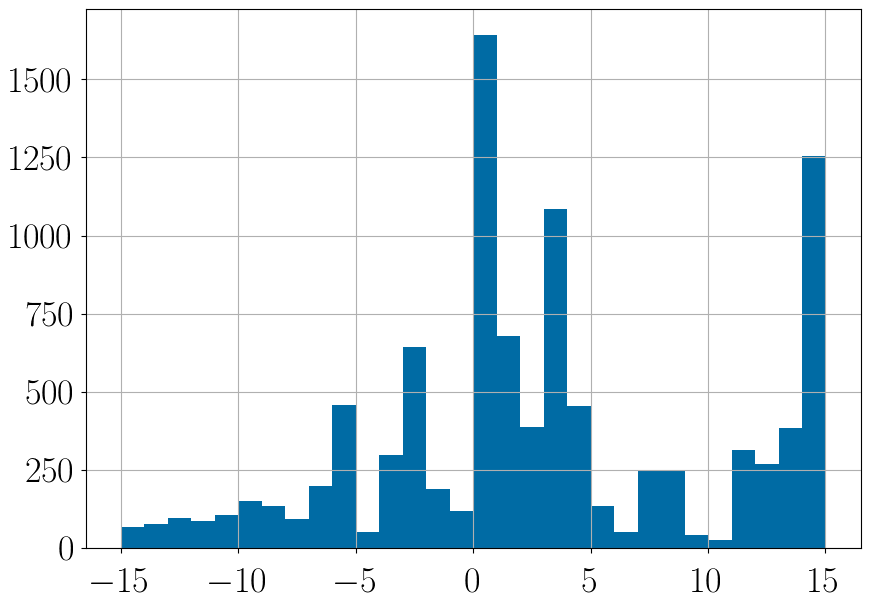

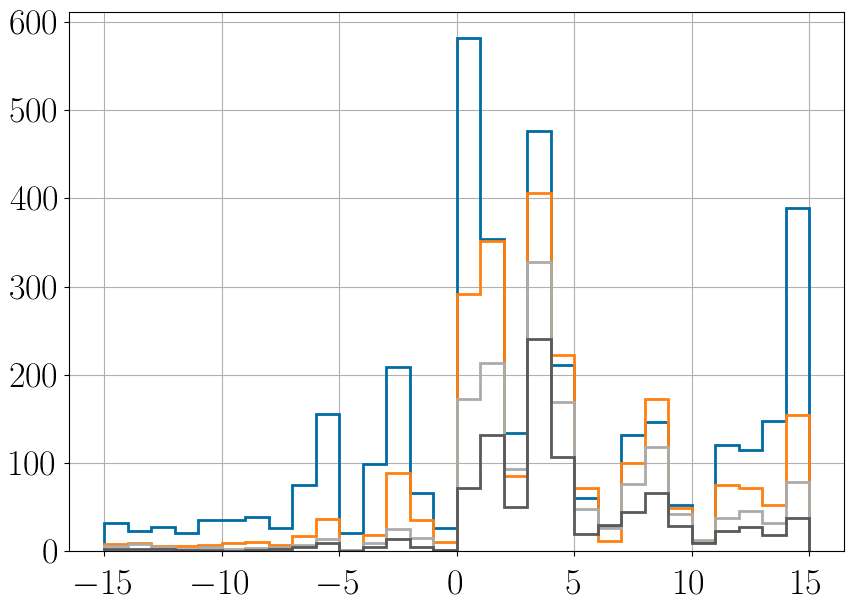

In [7]:
entries = np.arange(10000)

plt.hist(bkg_time_best-bkg_pretrig_times,bins=np.arange(corr_window[0],corr_window[1]+1))
plt.show()

for snr_bin, snr_mask in zip( snr_masks.keys(), snr_masks.values() ):
    plt.hist(sig_time_best[snr_mask]-sig_pretrig_times[snr_mask],bins=np.arange(corr_window[0],corr_window[1]+1),label=f'SNR = {snr_bin}--{snr_bin+snr_bin_width}',histtype='step',linewidth=2.)


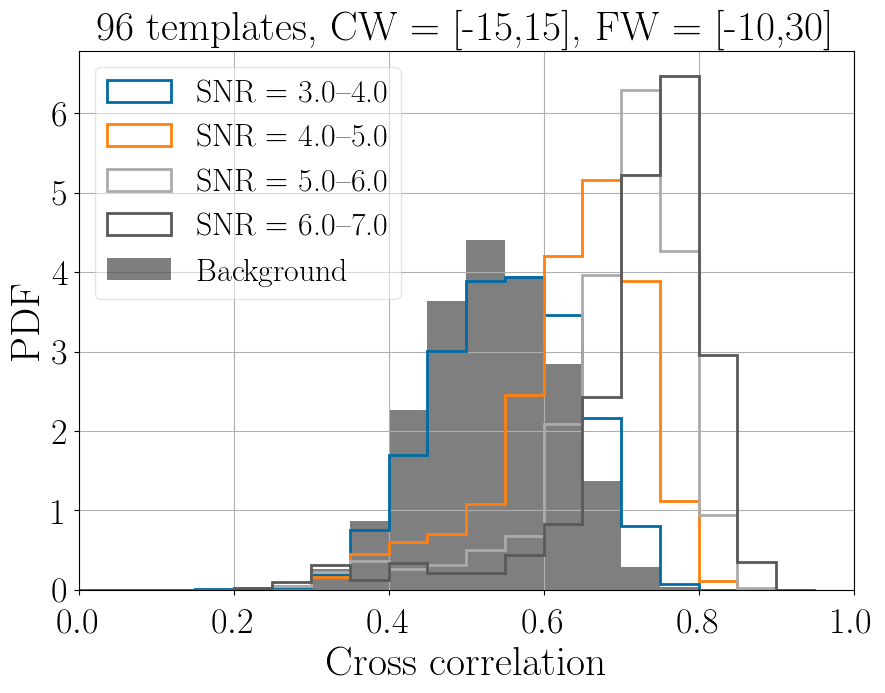

In [8]:
corr_bins = np.arange(0,1,.05)

for snr_bin, snr_mask in zip( snr_masks.keys(), snr_masks.values() ):
    plt.hist(sig_corr_max[snr_mask],bins=corr_bins,density=True,label=f'SNR = {snr_bin}--{snr_bin+snr_bin_width}',histtype='step',linewidth=2.)

plt.hist(bkg_corr_max,color='k',bins=corr_bins,density=True,alpha=.5,label='Background')
#plt.hist(bkg_ts_1khz,color='k',bins=ts_bins,density=True,alpha=.5,label='Background for L1 @ 1kHz')

#plt.axvline(ts_90,color='k',ls='--',label=r'90\% background rejection')

plt.xlim([0,1])
#plt.yscale('log')

plt.xlabel('Cross correlation')
plt.ylabel('PDF')
#plt.title('FLT-1 TF')
plt.title(title_str)

#plt.text(1.55,1.2,'GRAND preliminary', color='crimson')

plt.legend(fontsize=23,frameon=True,framealpha=.5,loc='upper left')

if savefig:
    plot_name = 'ts_TF_' + param_str
    
    plt.savefig( os.path.join(plot_dir,plot_name+'.png') )
    plt.savefig( os.path.join(plot_dir,plot_name+'.pdf') )

plt.show()

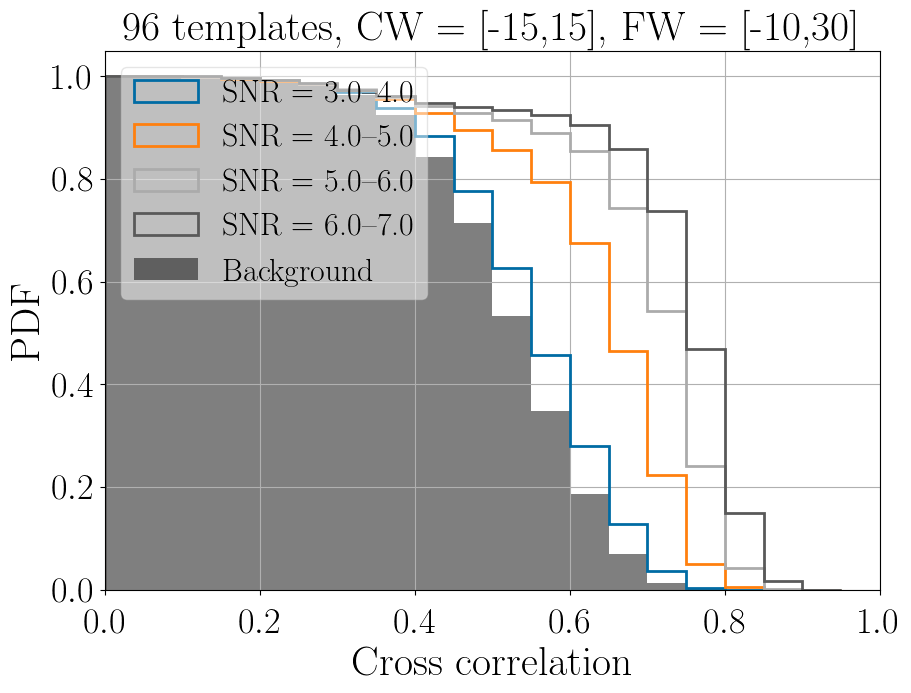

In [24]:
corr_bins = np.arange(0,1,.05)

for snr_bin, snr_mask in zip( snr_masks.keys(), snr_masks.values() ):
    plt.hist(sig_corr_best[snr_mask],bins=corr_bins,density=True,label=f'SNR = {snr_bin}--{snr_bin+snr_bin_width}',histtype='step',linewidth=2.,cumulative=-1)

plt.hist(bkg_corr_best,color='k',bins=corr_bins,density=True,alpha=.5,label='Background',cumulative=-1)
#plt.hist(bkg_corr_best_1khz,color='k',bins=corr_bins,density=True,alpha=.2,label='Background for L1 @ 1kHz')

#plt.axvline(ts_90,color='k',ls='--',label=r'90\% background rejection')

plt.xlim([0,1])
#plt.yscale('log')

plt.xlabel('Cross correlation')
plt.ylabel('PDF')
#plt.title('FLT-1 TF')
plt.title(title_str)

#plt.text(1.55,1.2,'GRAND preliminary', color='crimson')

plt.legend(fontsize=23,frameon=True,framealpha=.5,loc='upper left')

if savefig:
    plot_name = 'ts_TF_' + param_str
    
    plt.savefig( os.path.join(plot_dir,plot_name+'.png') )
    plt.savefig( os.path.join(plot_dir,plot_name+'.pdf') )

plt.show()

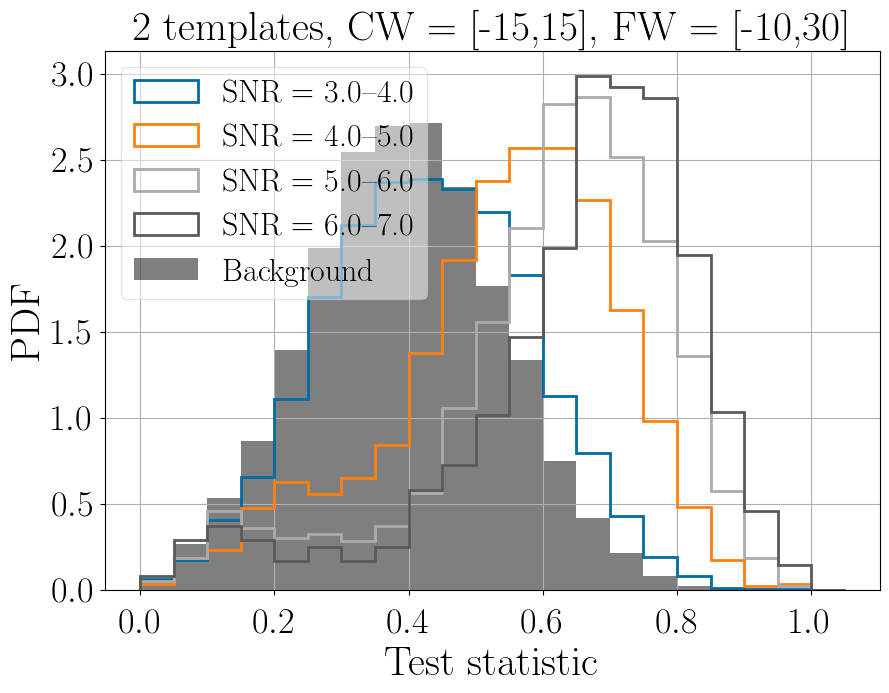

In [23]:
ts_bins = np.arange(0,1.1,.05)#np.arange(-1,5,.05)

for snr_bin, snr_mask in zip( snr_masks.keys(), snr_masks.values() ):
    plt.hist(sig_ts[snr_mask],bins=ts_bins,density=True,label=f'SNR = {snr_bin}--{snr_bin+snr_bin_width}',histtype='step',linewidth=2.)

plt.hist(bkg_ts,color='k',bins=ts_bins,density=True,alpha=.5,label='Background')
#plt.hist(bkg_ts_1khz,color='k',bins=ts_bins,density=True,alpha=.5,label='Background for L1 @ 1kHz')

#plt.axvline(ts_90,color='k',ls='--',label=r'90\% background rejection')

#plt.xlim([1.5,3.5])
#plt.yscale('log')

plt.xlabel('Test statistic')
plt.ylabel('PDF')
#plt.title('FLT-1 TF')
plt.title(title_str)

#plt.text(1.55,1.2,'GRAND preliminary', color='crimson')

plt.legend(fontsize=23,frameon=True,framealpha=.5,loc='upper left')

if savefig:
    plot_name = 'ts_TF_' + param_str
    
    plt.savefig( os.path.join(plot_dir,plot_name+'.png') )
    plt.savefig( os.path.join(plot_dir,plot_name+'.pdf') )

plt.show()

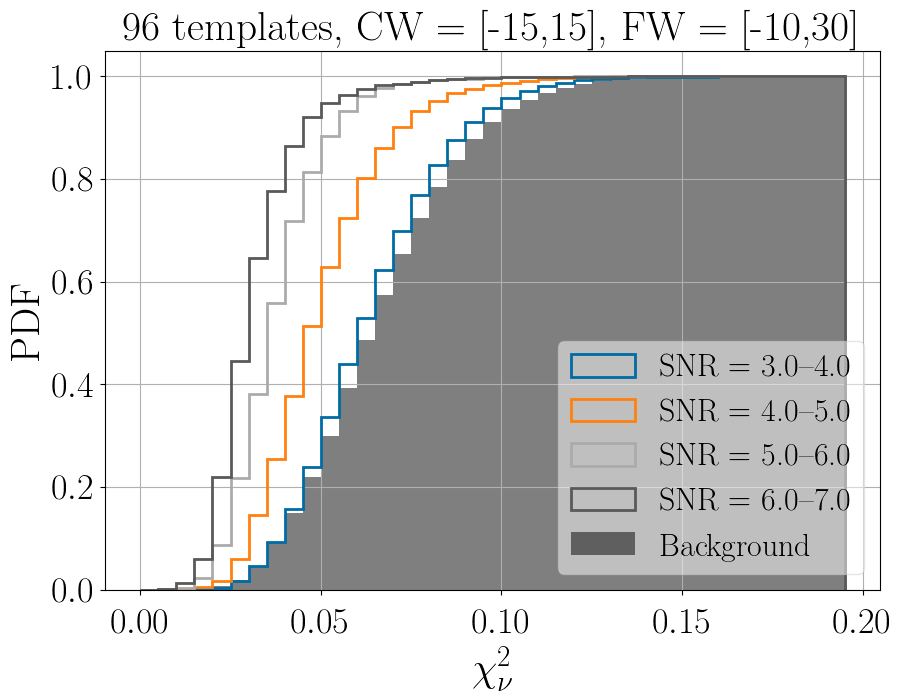

In [15]:
ts_bins = np.arange(0,0.2,.005)#np.arange(-1,5,.05)

for snr_bin, snr_mask in zip( snr_masks.keys(), snr_masks.values() ):
    plt.hist(sig_chi2_best[snr_mask],bins=ts_bins,density=True,label=f'SNR = {snr_bin}--{snr_bin+snr_bin_width}',histtype='step',linewidth=2.,cumulative=True)

plt.hist(bkg_chi2_best,color='k',bins=ts_bins,density=True,alpha=.5,label='Background',cumulative=True)
#plt.hist(bkg_ts_1khz,color='k',bins=ts_bins,density=True,alpha=.5,label='Background for L1 @ 1kHz')

#plt.axvline(ts_90,color='k',ls='--',label=r'90\% background rejection')

#plt.xlim([1.5,3.5])
#plt.yscale('log')

plt.xlabel(r'$\chi^2_{\nu}$')
plt.ylabel('PDF')
#plt.title('FLT-1 TF')
plt.title(title_str)

#plt.text(1.55,1.2,'GRAND preliminary', color='crimson')

plt.legend(fontsize=23,frameon=True,framealpha=.5,loc='lower right')

if savefig:
    plot_name = 'ts_TF_' + param_str
    
    plt.savefig( os.path.join(plot_dir,plot_name+'.png') )
    plt.savefig( os.path.join(plot_dir,plot_name+'.pdf') )

plt.show()

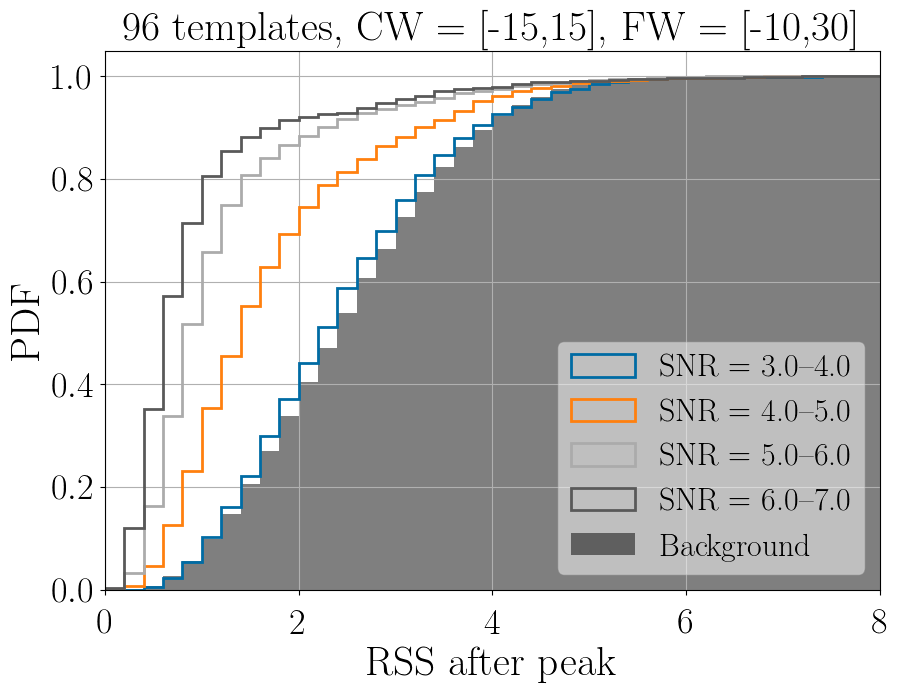

In [13]:
ts_bins = np.arange(0,10,.2)#np.arange(-1,5,.05)

for snr_bin, snr_mask in zip( snr_masks.keys(), snr_masks.values() ):
    plt.hist(sig_rss_pp_max[snr_mask],bins=ts_bins,density=True,label=f'SNR = {snr_bin}--{snr_bin+snr_bin_width}',histtype='step',linewidth=2.,cumulative=True)

plt.hist(bkg_rss_pp_max,color='k',bins=ts_bins,density=True,alpha=.5,label='Background',cumulative=True)
#plt.hist(bkg_ts_1khz,color='k',bins=ts_bins,density=True,alpha=.5,label='Background for L1 @ 1kHz')

#plt.axvline(ts_90,color='k',ls='--',label=r'90\% background rejection')

plt.xlim([0,8])
#plt.yscale('log')

plt.xlabel(r'RSS after peak')
plt.ylabel('PDF')
#plt.title('FLT-1 TF')
plt.title(title_str)

#plt.text(1.55,1.2,'GRAND preliminary', color='crimson')

plt.legend(fontsize=23,frameon=True,framealpha=.5,loc='lower right')

if savefig:
    plot_name = 'ts_TF_' + param_str
    
    plt.savefig( os.path.join(plot_dir,plot_name+'.png') )
    plt.savefig( os.path.join(plot_dir,plot_name+'.pdf') )

plt.show()

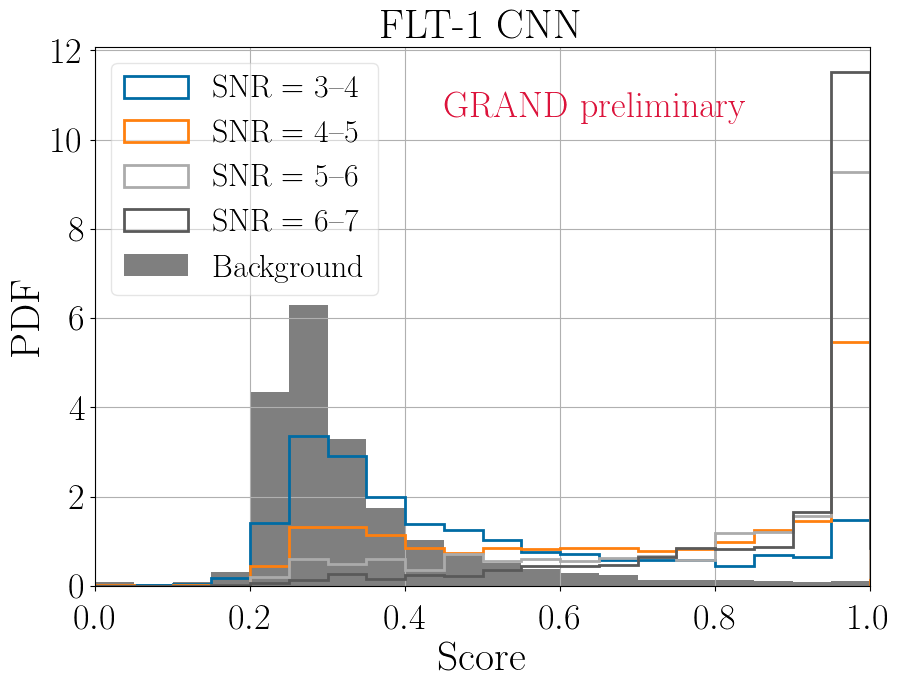

In [27]:
score_bins = np.arange(0,1.1,.05)

for snr_bin, snr_mask in zip( snr_masks.keys(), snr_masks.values() ):
    plt.hist(sig_score_ML[snr_mask],bins=score_bins,density=True,label=f'SNR = {snr_bin}--{snr_bin+snr_bin_width}',histtype='step',linewidth=2.)

plt.hist(bkg_score_ML,color='k',bins=score_bins,density=True,alpha=.5,label='Background')
#plt.hist(bkg_ts_1khz,color='k',bins=ts_bins,density=True,alpha=.5,label='Background for L1 @ 1kHz')

#plt.axvline(ts_90,color='k',ls='--',label=r'90\% background rejection')

plt.xlim([0,1])
#plt.yscale('log')

plt.xlabel('Score')
plt.ylabel('PDF')
plt.title('FLT-1 CNN')

plt.text(0.45,10.5,'GRAND preliminary', color='crimson')

plt.legend(fontsize=23,frameon=True,framealpha=.5,loc='upper left')

if savefig:
    plot_name = 'score_CNN' #+ param_str
    
    plt.savefig( os.path.join(plot_dir,plot_name+'.png') )
    plt.savefig( os.path.join(plot_dir,plot_name+'.pdf') )

plt.show()

In [18]:
def get_selection_efficiency(ts_values,
                             ts_thresh):
    
    selection_eff = np.zeros(ts_thresh.shape)

    for i, ts in enumerate(ts_thresh):
        sel_mask         = np.where(ts_values>=ts,True,False)
        selection_eff[i] = len(sel_mask[sel_mask])

    selection_eff /= len(ts_values)

    return selection_eff

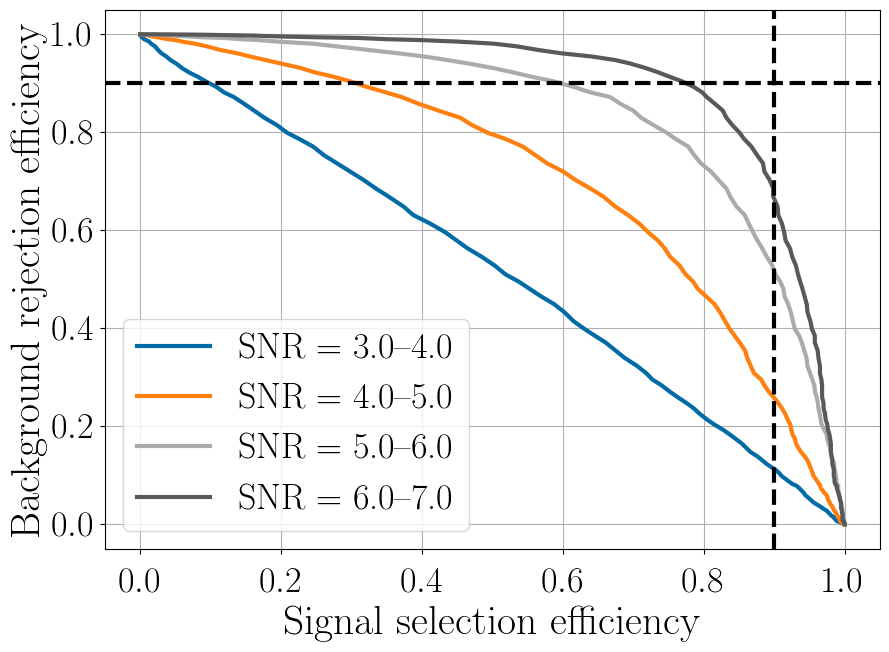

In [27]:
ts_thresh = np.arange(-10,0,.05)

bkg_sel_eff = get_selection_efficiency(-bkg_rss_pp_max,ts_thresh)
bkg_rej_eff = 1 - bkg_sel_eff

# bkg_sel_eff_1khz = get_selection_efficiency(bkg_ts_1khz,ts_thresh)
# bkg_rej_eff_1khz = 1 - bkg_sel_eff_1khz

for snr_bin, snr_mask in zip( snr_masks.keys(), snr_masks.values() ):
    sig_sel_eff = get_selection_efficiency(-sig_rss_pp_max[snr_mask],ts_thresh)
    plt.plot(sig_sel_eff,bkg_rej_eff,label=f'SNR = {snr_bin}--{snr_bin+snr_bin_width}')

plt.axhline(0.9,color='k',linestyle='--')
plt.axvline(0.9,color='k',linestyle='--')
#plt.axvline(0.8,color='k',linestyle='--')

plt.xlabel('Signal selection efficiency')
plt.ylabel('Background rejection efficiency')
#plt.title('L1 trigger rate = 1 kHz')
#plt.title('X+Y, FLT-1 TF')
#plt.title(f'{n_templates} templates')

#plt.text(0.5,0.,'GRAND preliminary', color='crimson')

plt.legend(frameon=True,framealpha=.8)

if savefig:
    plot_name = 'sig_sel_vs_bkg_rej_efficiency_TF' # + param_str
    
    plt.savefig( os.path.join(plot_dir,plot_name+'.png') )
    plt.savefig( os.path.join(plot_dir,plot_name+'.pdf') )

plt.show()

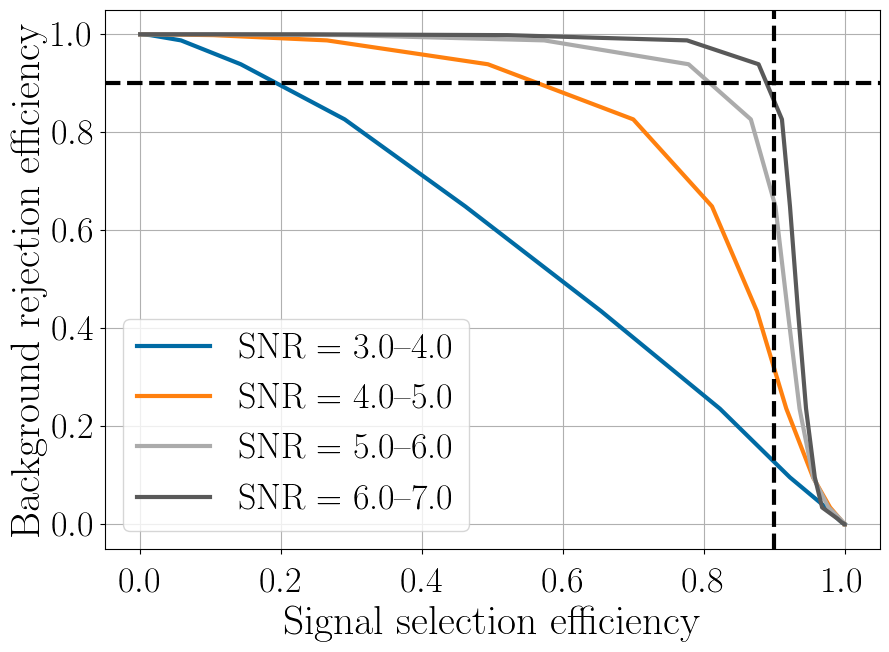

In [28]:
ts_thresh = np.arange(0,2,.05)

bkg_sel_eff = get_selection_efficiency(bkg_corr_best,ts_thresh)
bkg_rej_eff = 1 - bkg_sel_eff

# bkg_sel_eff_1khz = get_selection_efficiency(bkg_ts_1khz,ts_thresh)
# bkg_rej_eff_1khz = 1 - bkg_sel_eff_1khz

for snr_bin, snr_mask in zip( snr_masks.keys(), snr_masks.values() ):
    sig_sel_eff = get_selection_efficiency(sig_corr_best[snr_mask],ts_thresh)
    plt.plot(sig_sel_eff,bkg_rej_eff,label=f'SNR = {snr_bin}--{snr_bin+snr_bin_width}')

plt.axhline(0.9,color='k',linestyle='--')
plt.axvline(0.9,color='k',linestyle='--')
#plt.axvline(0.8,color='k',linestyle='--')

plt.xlabel('Signal selection efficiency')
plt.ylabel('Background rejection efficiency')
#plt.title('L1 trigger rate = 1 kHz')
#plt.title('X+Y, FLT-1 TF')
#plt.title(f'{n_templates} templates')

#plt.text(0.5,0.,'GRAND preliminary', color='crimson')

plt.legend(frameon=True,framealpha=.8)

if savefig:
    plot_name = 'sig_sel_vs_bkg_rej_efficiency_TF' # + param_str
    
    plt.savefig( os.path.join(plot_dir,plot_name+'.png') )
    plt.savefig( os.path.join(plot_dir,plot_name+'.pdf') )

plt.show()

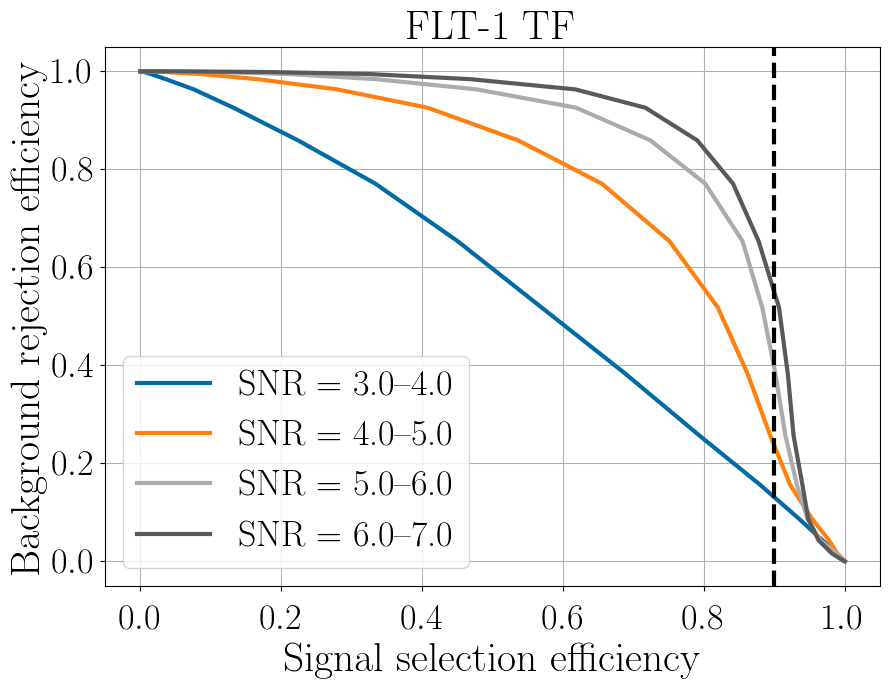

In [29]:
ts_thresh = np.arange(0,2,.05)

bkg_sel_eff = get_selection_efficiency(bkg_ts,ts_thresh)
bkg_rej_eff = 1 - bkg_sel_eff

# bkg_sel_eff_1khz = get_selection_efficiency(bkg_ts_1khz,ts_thresh)
# bkg_rej_eff_1khz = 1 - bkg_sel_eff_1khz

for snr_bin, snr_mask in zip( snr_masks.keys(), snr_masks.values() ):
    sig_sel_eff = get_selection_efficiency(sig_ts[snr_mask],ts_thresh)
    plt.plot(sig_sel_eff,bkg_rej_eff,label=f'SNR = {snr_bin}--{snr_bin+snr_bin_width}')

plt.axvline(0.9,color='k',linestyle='--')
#plt.axvline(0.8,color='k',linestyle='--')

plt.xlabel('Signal selection efficiency')
plt.ylabel('Background rejection efficiency')
#plt.title('L1 trigger rate = 1 kHz')
plt.title('FLT-1 TF')
#plt.title(f'{n_templates} templates')

#plt.text(0.5,0.,'GRAND preliminary', color='crimson')

plt.legend(frameon=True,framealpha=.8)

if savefig:
    plot_name = 'sig_sel_vs_bkg_rej_efficiency_TF' # + param_str
    
    plt.savefig( os.path.join(plot_dir,plot_name+'.png') )
    plt.savefig( os.path.join(plot_dir,plot_name+'.pdf') )

plt.show()

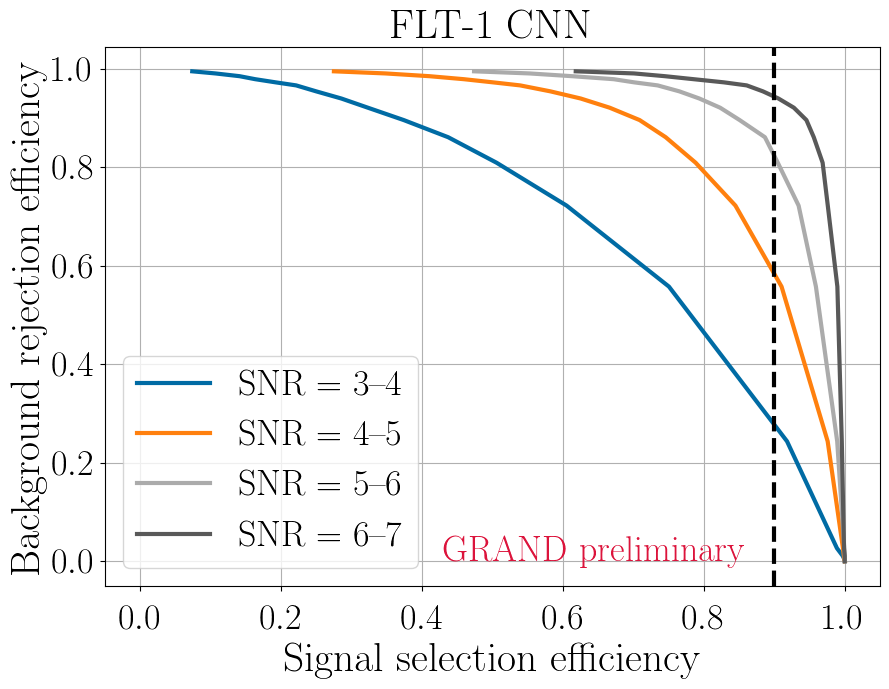

In [29]:
score_thresh = np.arange(0,1,.05)

bkg_sel_eff = get_selection_efficiency(bkg_score_ML,score_thresh)
bkg_rej_eff = 1 - bkg_sel_eff

# bkg_sel_eff_1khz = get_selection_efficiency(bkg_ts_1khz,ts_thresh)
# bkg_rej_eff_1khz = 1 - bkg_sel_eff_1khz

for snr_bin, snr_mask in zip( snr_masks.keys(), snr_masks.values() ):
    sig_sel_eff = get_selection_efficiency(sig_score_ML[snr_mask],score_thresh)
    plt.plot(sig_sel_eff,bkg_rej_eff,label=f'SNR = {snr_bin}--{snr_bin+snr_bin_width}')

#plt.axhline(0.9,color='k',linestyle='--')
plt.axvline(0.9,color='k',linestyle='--')
#plt.axvline(0.8,color='k',linestyle='--')

plt.xlim([-0.05,1.05])

plt.xlabel('Signal selection efficiency')
plt.ylabel('Background rejection efficiency')
#plt.title('L1 trigger rate = 1 kHz')
plt.title('FLT-1 CNN')
plt.legend(frameon=True,framealpha=.8)

plt.text(0.43,0.,'GRAND preliminary', color='crimson')

if savefig:
    plot_name = 'sig_sel_vs_bkg_rej_efficiency_CNN' #+ param_str
    
    plt.savefig( os.path.join(plot_dir,plot_name+'.png') )
    plt.savefig( os.path.join(plot_dir,plot_name+'.pdf') )

plt.show()

In [20]:
bkg_sel_eff = get_selection_efficiency(bkg_ts,ts_thresh)
bkg_rej_eff = 1 - bkg_sel_eff

idx_90 = np.where(bkg_rej_eff>=0.9)[0][0]
idx_99 = np.where(bkg_rej_eff>=0.99)[0][0]

for snr_bin, snr_mask in zip( snr_masks.keys(), snr_masks.values() ):
    sig_sel_eff = get_selection_efficiency(sig_ts[snr_mask],ts_thresh)
    
    msg  = f'SNR bin: {snr_bin}--{snr_bin+snr_bin_width}'
    msg += f'\nbkg_rej_eff: {bkg_rej_eff[idx_90]} <--> sig_sel_eff: {sig_sel_eff[idx_90]}'
    msg += f'\nbkg_rej_eff: {bkg_rej_eff[idx_99]} <--> sig_sel_eff: {sig_sel_eff[idx_99]}'


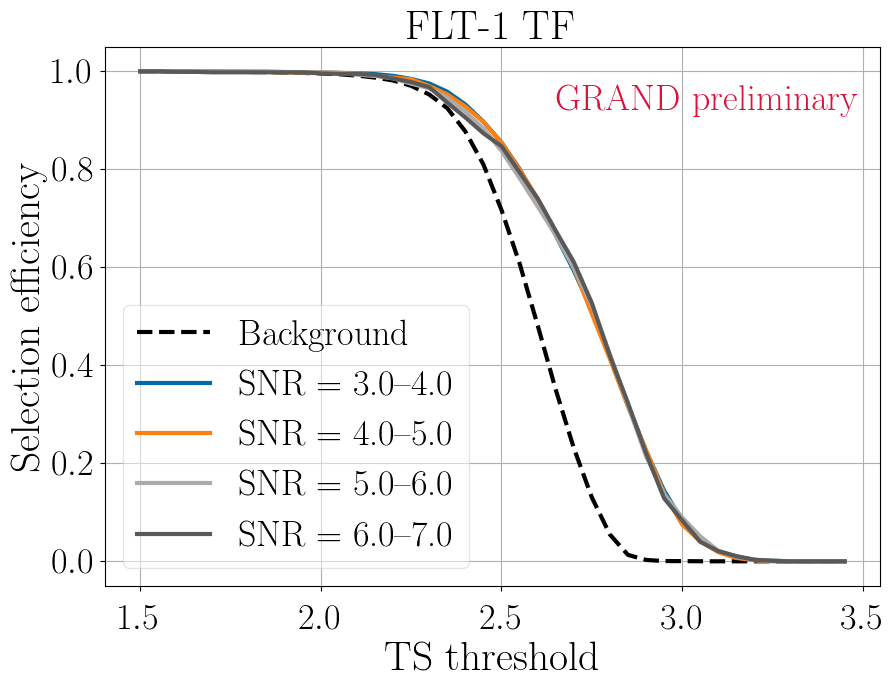

In [18]:
ts_thresh = np.arange(1.5,3.5,.05)

bkg_sel_eff = get_selection_efficiency(bkg_ts,ts_thresh)
bkg_rej_eff = 1 - bkg_sel_eff

plt.plot(ts_thresh,bkg_sel_eff,label=f'Background',color='k',ls='--')
#plt.axvline(ts_90,color='k',ls='--',label=r'90\% bkg rej.~for L1 at 1 kHz')

for snr_bin, snr_mask in zip( snr_masks.keys(), snr_masks.values() ):
    sig_sel_eff = get_selection_efficiency(sig_ts[snr_mask],ts_thresh)
    plt.plot(ts_thresh,sig_sel_eff,label=f'SNR = {snr_bin}--{snr_bin+snr_bin_width}')

plt.xlabel('TS threshold')
plt.ylabel('Selection efficiency')
plt.title('FLT-1 TF')
#plt.title(f'{n_templates} templates')

plt.legend(frameon=True,framealpha=.5,loc='lower left')

plt.text(2.65,0.92,'GRAND preliminary', color='crimson')

if savefig:
    plot_name = 'sel_efficiency_vs_ts_TF' #+ param_str
    
    plt.savefig( os.path.join(plot_dir,plot_name+'.png') )
    plt.savefig( os.path.join(plot_dir,plot_name+'.pdf') )

plt.show()

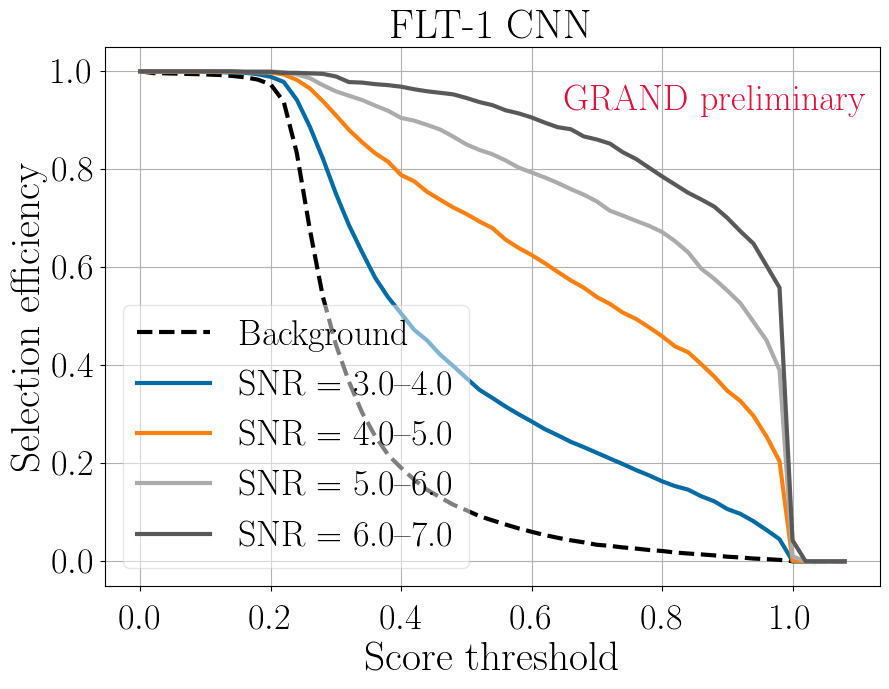

In [31]:
score_thresh = np.arange(0,1.1,.02)

bkg_sel_eff = get_selection_efficiency(bkg_score_ML,score_thresh)
bkg_rej_eff = 1 - bkg_sel_eff

plt.plot(score_thresh,bkg_sel_eff,label=f'Background',color='k',ls='--')
#plt.axvline(ts_90,color='k',ls='--',label=r'90\% bkg rej.~for L1 at 1 kHz')

for snr_bin, snr_mask in zip( snr_masks.keys(), snr_masks.values() ):
    sig_sel_eff = get_selection_efficiency(sig_score_ML[snr_mask],score_thresh)
    plt.plot(score_thresh,sig_sel_eff,label=f'SNR = {snr_bin}--{snr_bin+snr_bin_width}')

plt.xlabel('Score threshold')
plt.ylabel('Selection efficiency')
plt.title('FLT-1 CNN')
plt.legend(frameon=True,framealpha=.5,loc='lower left')

plt.text(0.65,0.92,'GRAND preliminary', color='crimson')

if savefig:
    plot_name = 'sel_efficiency_vs_score_CNN' #+ param_str
    
    plt.savefig( os.path.join(plot_dir,plot_name+'.png') )
    plt.savefig( os.path.join(plot_dir,plot_name+'.pdf') )

plt.show()

Check distribution of best-template IDs

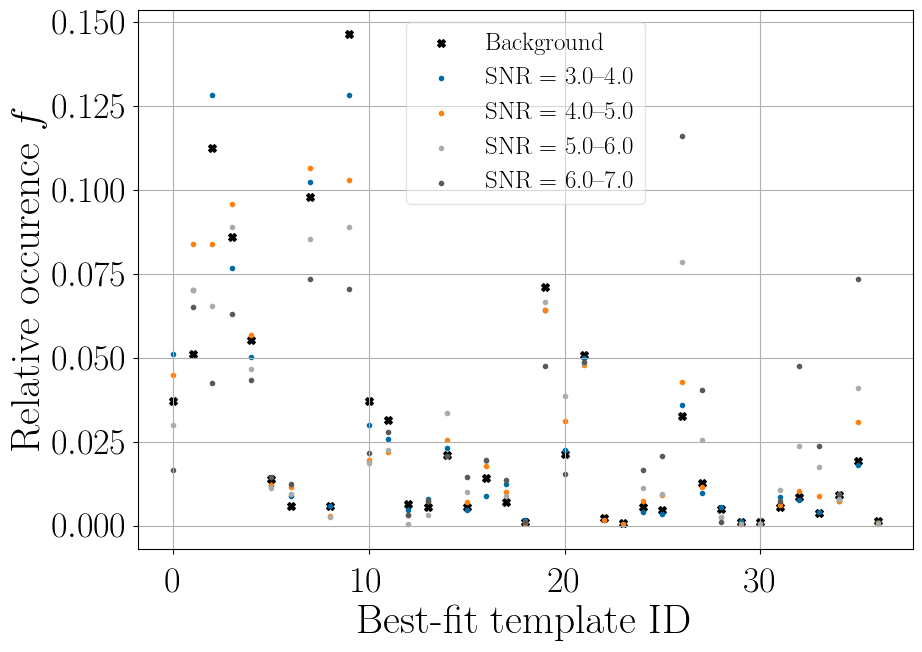

In [18]:
template_ids = np.arange(n_templates)

bkg_template_ids, bkg_template_rel_counts = np.unique(bkg_idx_template_best,return_counts=True)
bkg_template_rel_counts                   = bkg_template_rel_counts/bkg_template_rel_counts.sum()



plt.scatter(bkg_template_ids, bkg_template_rel_counts, color='k', marker='X', s=30, label='Background')

for snr_bin, snr_mask in zip( snr_masks.keys(), snr_masks.values() ):
    sig_template_ids, sig_template_rel_counts = np.unique(sig_idx_template_best[snr_mask],return_counts=True)
    sig_template_rel_counts                   = sig_template_rel_counts/sig_template_rel_counts.sum()

    plt.scatter(sig_template_ids, sig_template_rel_counts, label=f'SNR = {snr_bin}--{snr_bin+snr_bin_width}')

plt.xlabel('Best-fit template ID')
plt.ylabel(r'Relative occurence $f$')
plt.legend(fontsize=18,frameon=True,framealpha=.5)
plt.show()

In [19]:
def get_relative_counts(idx_template_best,template_ids):
    template_ids_unique, template_rel_counts = np.unique(idx_template_best,return_counts=True)
    template_rel_counts                      = template_rel_counts/template_rel_counts.sum()

    for id in template_ids:
        if id not in template_ids_unique:
            template_ids_unique = np.append(template_ids_unique,id)
            template_rel_counts = np.append(template_rel_counts,0)

    sort_idcs = np.argsort(template_ids_unique)

    return template_ids_unique[sort_idcs], template_rel_counts[sort_idcs]

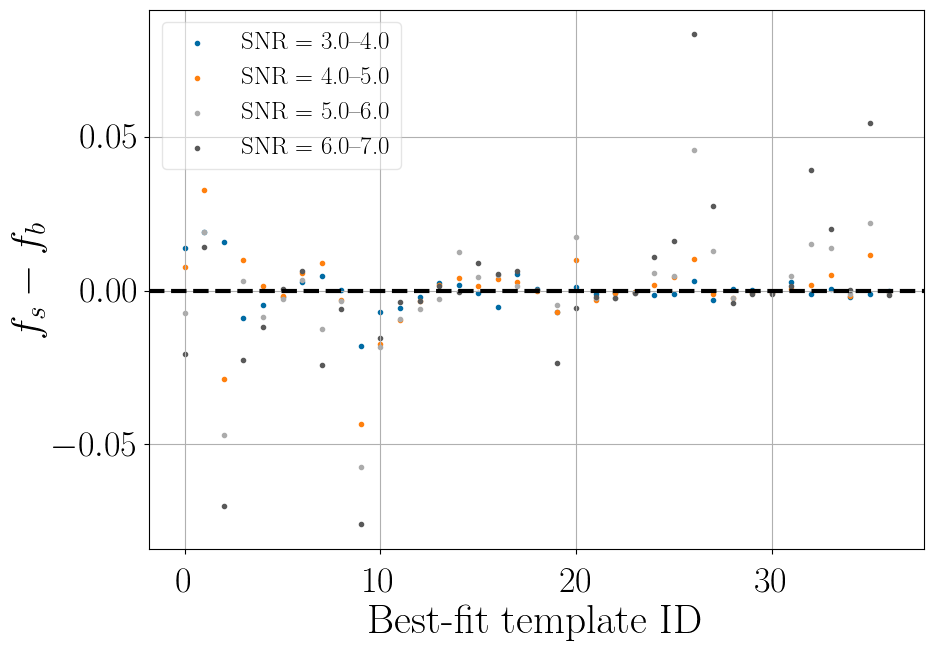

In [20]:
bkg_template_ids, bkg_template_rel_counts = get_relative_counts(bkg_idx_template_best,template_ids)

for snr_bin, snr_mask in zip( snr_masks.keys(), snr_masks.values() ):
    sig_template_ids, sig_template_rel_counts = get_relative_counts(sig_idx_template_best[snr_mask],template_ids)


    plt.scatter(sig_template_ids, ( sig_template_rel_counts - bkg_template_rel_counts[sig_template_ids] ) / 1., label=f'SNR = {snr_bin}--{snr_bin+snr_bin_width}')

plt.axhline(0,ls='--',color='k')

#plt.ylim([-0.02,0.02])

plt.xlabel('Best-fit template ID')
plt.ylabel(r'$f_s - f_b$')
plt.legend(fontsize=18,frameon=True,framealpha=.5)
plt.show()

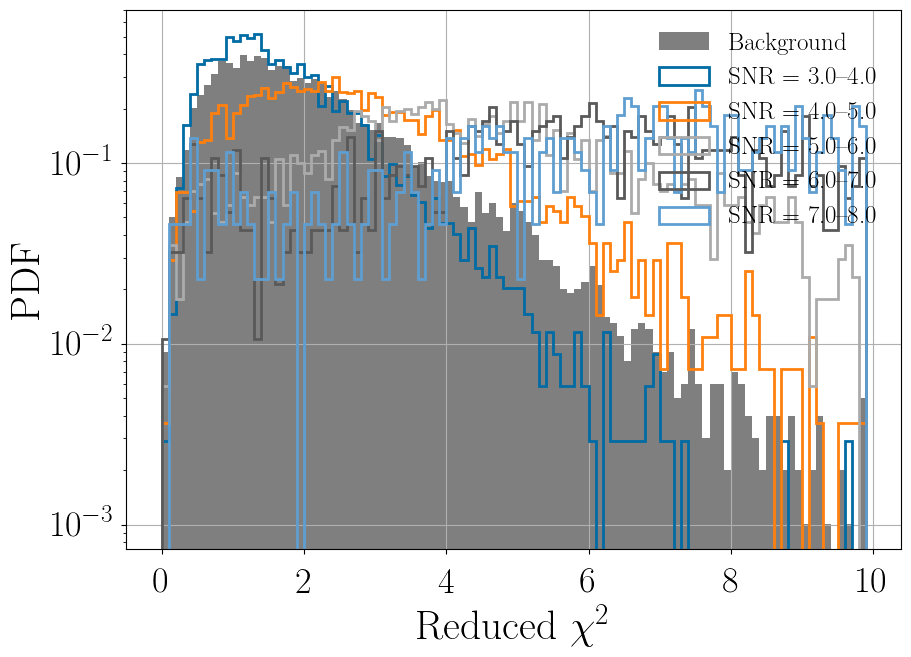

In [117]:
chi2_bins = np.arange(0,10,.1)


plt.hist(bkg_chi2_best,bins=chi2_bins,density=True,alpha=.5,color='k',label='Background')

for snr_bin, snr_mask in zip( snr_masks.keys(), snr_masks.values() ):
    plt.hist(sig_chi2_best[snr_mask],bins=chi2_bins,density=True,label=f'SNR = {snr_bin}--{snr_bin+snr_bin_width}',histtype='step',linewidth=2.)


plt.yscale('log')

plt.xlabel(r'Reduced $\chi^2$')
plt.ylabel(r'PDF')

plt.legend(fontsize=18)
plt.show()

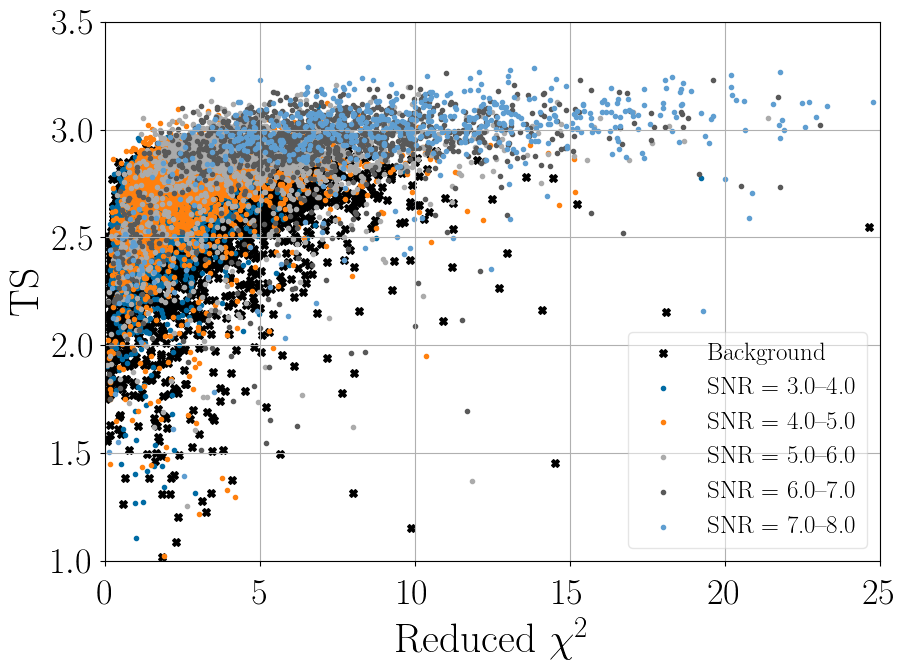

In [118]:
plt.scatter(bkg_chi2_best,bkg_ts,color='k',marker='X', s=30,label='Background')

for snr_bin, snr_mask in zip( snr_masks.keys(), snr_masks.values() ):
    plt.scatter(sig_chi2_best[snr_mask],sig_ts[snr_mask],alpha=1,label=f'SNR = {snr_bin}--{snr_bin+snr_bin_width}')

plt.xlim([0,25])
plt.ylim([1,3.5])

plt.xlabel(r'Reduced $\chi^2$')
plt.ylabel('TS')

plt.legend(fontsize=18,frameon=True,framealpha=.5)

plt.show()

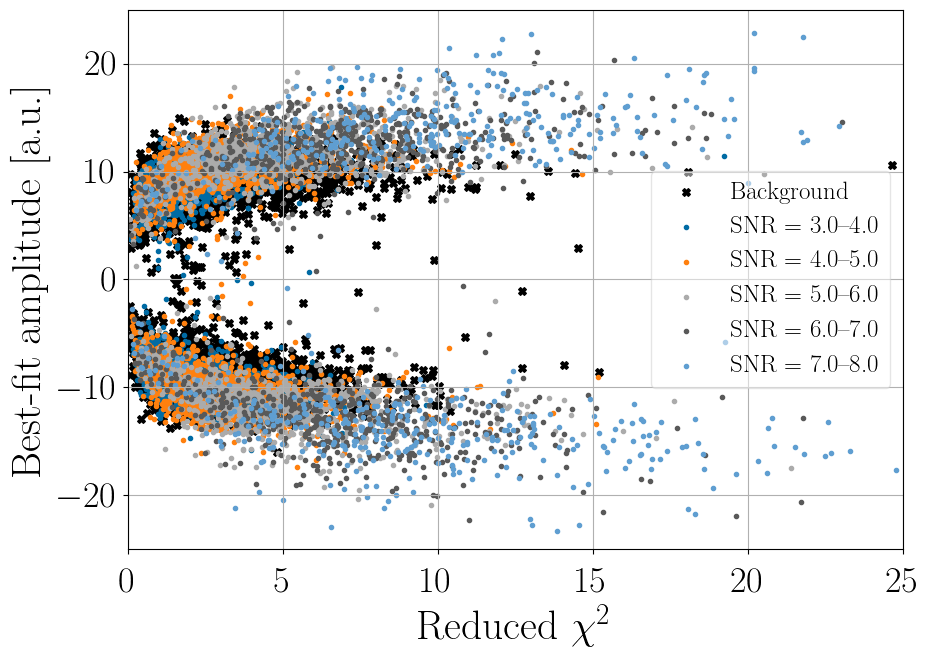

In [119]:
plt.scatter(bkg_chi2_best,bkg_ampl_best,color='k',marker='X', s=30,label='Background')

for snr_bin, snr_mask in zip( snr_masks.keys(), snr_masks.values() ):
    plt.scatter(sig_chi2_best[snr_mask],sig_ampl_best[snr_mask],alpha=1,label=f'SNR = {snr_bin}--{snr_bin+snr_bin_width}')

plt.xlim([0,25])
plt.ylim([-25,25])

plt.xlabel(r'Reduced $\chi^2$')
plt.ylabel('Best-fit amplitude [a.u.]')

plt.legend(fontsize=18,frameon=True,framealpha=.5)
plt.show()

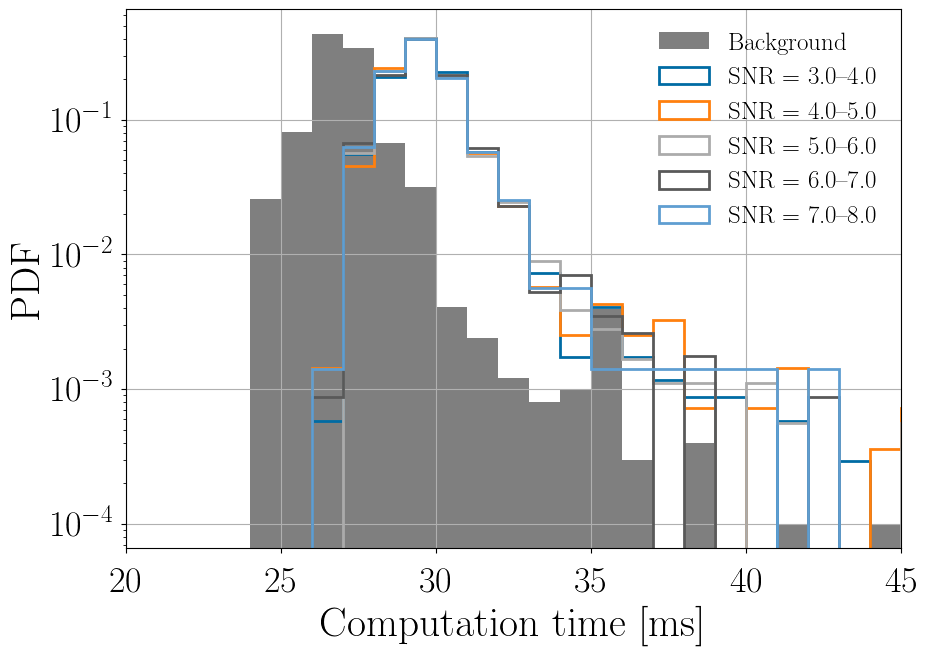

In [120]:
comp_time_bins = np.arange(20,50,1)

plt.hist(bkg_comp_time*1000,bins=comp_time_bins,density=True,alpha=.5,color='k',label='Background')

for snr_bin, snr_mask in zip( snr_masks.keys(), snr_masks.values() ):
    plt.hist(sig_comp_time[snr_mask]*1000,bins=comp_time_bins,density=True,label=f'SNR = {snr_bin}--{snr_bin+snr_bin_width}',histtype='step',linewidth=2.)


plt.yscale('log')
plt.xlim([20,45])

plt.xlabel('Computation time [ms]')
plt.ylabel('PDF')

plt.legend(fontsize=18)
plt.show()

In [9]:
n_templates_vals = [1,2,8,17,37,96]
corr_window      = [-15,15]
fit_window       = [-10,15]
ts_thresh        = np.arange(1,4,.05)

sig_test_file = '/sps/grand/pcorrea/nutrig/database/sig/sig_dataset_nutrig_gp13_train_seed_300.npz'

with np.load(sig_test_file) as f:
    sig_traces = f['traces']
    sig_snr    = f['snr']
    sig_flags  = f['pretrig_flags']
    sig_snr    = tools.get_snr(sig_traces,f['inj_pulse_times'])
    sig_snr    = np.max(sig_snr[:,:2],axis=1)

snr_bin_width = 1
snr_bin_edges = np.arange(3,7.1,snr_bin_width)

snr_masks = {snr_bin : None for snr_bin in snr_bin_edges[:-1]}

for snr_bin in snr_masks.keys():
    snr_masks[snr_bin] = np.where( np.logical_and( sig_snr>=snr_bin, sig_snr<snr_bin+snr_bin_width ), True, False )

sig_sel_eff_thresh = 0.8
bkg_rej_eff_vals   = np.zeros((len(n_templates_vals),len(snr_bin_edges)-1))

for i, n_templates in enumerate(n_templates_vals): 
    param_str = f'templates_{n_templates}_cw_{corr_window[0]}_{corr_window[1]}_fw_{fit_window[0]}_{fit_window[1]}'

    bkg_test_res_file = f'/sps/grand/pcorrea/nutrig/template/results/results_template_FLT_bkg_dataset_nutrig_gp13_train_seed_300_{param_str}.npz'

    with np.load(bkg_test_res_file) as f:
        bkg_ts = f['ts']

    sig_test_res_file = f'/sps/grand/pcorrea/nutrig/template/results/results_template_FLT_sig_dataset_nutrig_gp13_train_seed_300_{param_str}.npz'

    with np.load(sig_test_res_file) as f:
        sig_ts = f['ts']

    bkg_sel_eff = get_selection_efficiency(bkg_ts,ts_thresh)

    for j, snr_mask in enumerate( snr_masks.values() ):
        sig_sel_eff = get_selection_efficiency(sig_ts[snr_mask],ts_thresh)
        idx         = np.where(sig_sel_eff>=.8)[0][-1]
        bkg_rej_eff_vals[i,j] = 1 - bkg_sel_eff[idx]


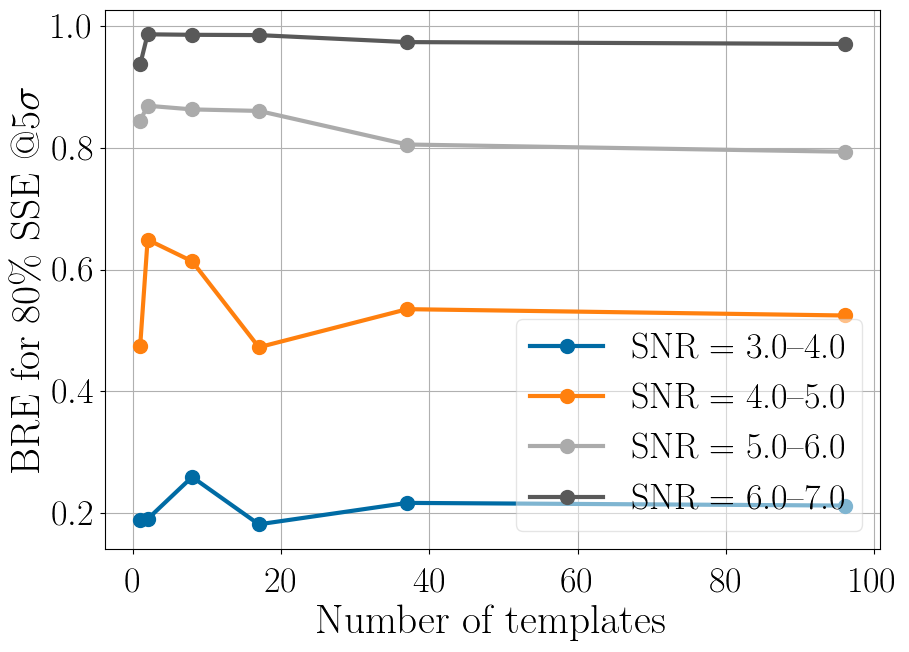

In [11]:
for i in range(bkg_rej_eff_vals.shape[1]):
    plt.plot(n_templates_vals,bkg_rej_eff_vals[:,i],label=f'SNR = {snr_bin_edges[i]}--{snr_bin_edges[i]+snr_bin_width}',marker='o',markersize=10)

plt.xlabel('Number of templates')
plt.ylabel('BRE for 80\% SSE @$5\sigma$')
# plt.title('FLT-1 TF')

plt.legend(frameon=True,framealpha=.5)

if savefig:
    plot_name = 'sel_efficiency_vs_n_templates_' + param_str
    
    plt.savefig( os.path.join(plot_dir,plot_name+'.png') )
    plt.savefig( os.path.join(plot_dir,plot_name+'.pdf') )

#plt.text(2.65,0.92,'GRAND preliminary', color='crimson')

plt.show()